# Estimacion del vCDR

Se busca la estimacion del vCDR, tanto en las predicciones obtenidas como en el groud trhts de las imagenes, a su vez se busca realizar un grafico de evaluacion 2

*cup to disc ratio (CDR)*


**vCDR = Vertical Cup-to-Disc Ratio** = d(OC)/d(OD)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
import glob
import ntpath
import pandas as pd
import imageio as io
import numpy as np
from PIL import Image
from sklearn import metrics


In [2]:
def get_paths(data_pred,test=True):
    predicted_img_p = []
    predicted_OD_p = []
    predicted_OC_p = []
    gt_OD_p = []
    gt_OC_p = []

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OC/*')):
        predicted_OC_p.append(p)

    for p in sorted(glob.glob(predict_path+ '/'+data_pred+'/OD/*')):
        predicted_OD_p.append(p)

    if test:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/Test/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/Test/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/Test/*')):
            gt_OD_p.append(p)
    else:
        for p in sorted(glob.glob(data_path + 'images/' + data_pred + '/*')):
            predicted_img_p.append(p)

        for p in sorted(glob.glob(data_path + 'OC/' + data_pred + '/*')):
            gt_OC_p.append(p)

        for p in sorted(glob.glob(data_path + 'OD1/' + data_pred + '/*')):
            gt_OD_p.append(p)

    return predicted_OC_p, predicted_OD_p, gt_OC_p, gt_OD_p

In [3]:
def get_vCDR_estimation(predicted_OC_p, predicted_OD_p, gt_OC_p, gt_OD_p):
    vCDR = []
    vCDR_gt = []

    for idx in range(len(predicted_OC_p)):
        pred_OC = np.array(Image.open(predicted_OC_p[idx]))
        gt_OC = np.array(Image.open(gt_OC_p[idx]))

        pred_OD = np.array(Image.open(predicted_OD_p[idx]))
        gt_OD = np.array(Image.open(gt_OD_p[idx]))
        
        dOC_pred = np.max(np.sum(pred_OC,axis=0))
        dOC_gt = np.max(np.sum(gt_OC,axis=0))

        dOD_pred = np.max(np.sum(pred_OD,axis=0))
        dOD_gt = np.max(np.sum(gt_OD,axis=0))

        vCDR.append(dOC_pred/dOD_pred)
        vCDR_gt.append(dOC_gt/dOD_gt)
      

    return vCDR, vCDR_gt

In [4]:
def cpearson(df):
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    correlation_matrix = np.corrcoef(df['vCDR predicho'], df['vCDR real'])
    #print('ĆORRELATION MATRIX', correlation_matrix)
    correlation_xy = correlation_matrix[0, 1]
    return correlation_xy



def r_squared(df):
    '''
    Compute the R2
    '''
    # remove any (inf, -inf, nan) values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    correlation_matrix = np.corrcoef(df['vCDR predicho'], df['vCDR real'])
    #print('ĆORRELATION MATRIX', correlation_matrix)
    correlation_xy = correlation_matrix[0, 1]
    r2 = correlation_xy ** 2
    
    return r2

def mae(df):
    '''
    Compute the Mean Absolute Error
    '''
    # remove any (inf, -inf, nan) values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    mea_value = metrics.mean_absolute_error(df['vCDR real'],df['vCDR predicho'])

    return mea_value

def RMSE(df):
    '''
    Compute the Root Mean Squared Error'''
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    mse_value = metrics.mean_squared_error(df['vCDR real'],df['vCDR predicho'])
    return np.sqrt(mse_value)

# MODEL D

In [127]:
predict_path = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelD/'
data_path = '/mnt/Almacenamiento/ODOC_segmentation/data/'
dataset_predicted = 'DRISHTI'
dataset_to_train = 'DRISHTI'# 'DRIDHTI' 

In [130]:
p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('DRISHTI',test=True)
vCDR_D, vCDR_gt_D = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)

p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('RIM_ONE_R3',test=False)
vCDR_R3, vCDR_gt_R3 = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)

p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('REFUGE',test=True)
vCDR_R, vCDR_gt_R = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)

p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('ORIGA',test=False)
vCDR_O, vCDR_gt_O = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)


vCDR_data_D= {
    'vCDR real' :vCDR_gt_D,
    'vCDR predicho':vCDR_D
    }

vCDR_data_R3={
    'vCDR real' :vCDR_gt_R3,
    'vCDR predicho':vCDR_R3
}

vCDR_data_R ={
    'vCDR real' :vCDR_gt_R,
    'vCDR predicho':vCDR_R
}

vCDR_data_O={
    'vCDR real' :vCDR_gt_O,
    'vCDR predicho':vCDR_O
}

df_D = pd.DataFrame(vCDR_data_D)
df_R3 = pd.DataFrame(vCDR_data_R3)
df_R = pd.DataFrame(vCDR_data_R)
df_O = pd.DataFrame(vCDR_data_O)


/tmp/ipykernel_720602/1346332590.py:18: RuntimeWarning: invalid value encountered in ulong_scalars
  vCDR.append(dOC_pred/dOD_pred)


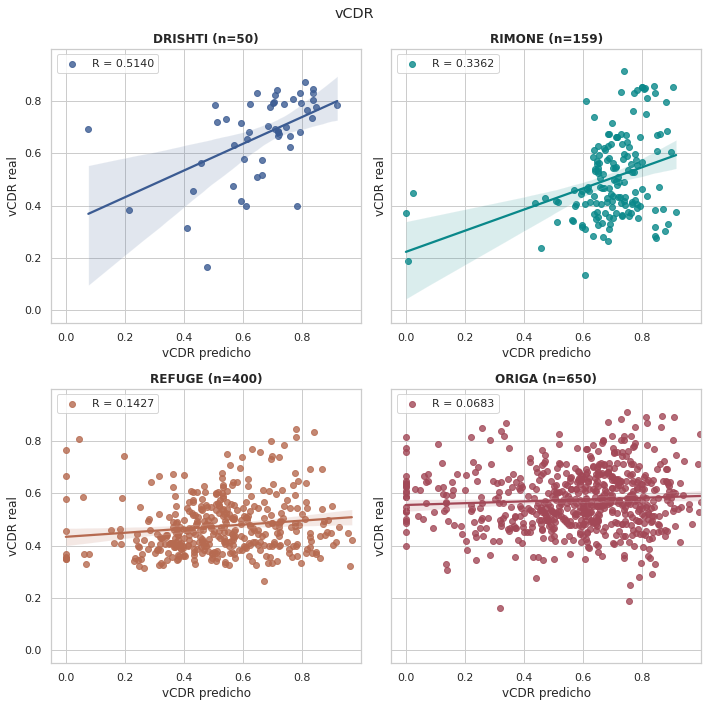

In [132]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
#fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=2,ncols=2, sharey=True)

sns.set_palette("Paired")

sns.set_theme(style="whitegrid")

# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=list(np.arange(0, 1, 0.2)),
        yticks=list(np.arange(0, 1, 0.2)), xlim=[-0.05,1], ylim=[-0.05,1])


plt.xlabel('vCDR predicho')
plt.ylabel('vCDR real')

sns.regplot(x='vCDR predicho',y='vCDR real',data=df_D,ax=axes[0,0],color=sns.xkcd_rgb["denim blue"])
axes[0,0].set_title('DRISHTI (n=50)',fontweight='bold')
axes[0,0].legend(['R = {:.4f}'.format(cpearson(df_D))], loc='upper left')

sns.regplot(x='vCDR predicho',y='vCDR real',data=df_R3,ax=axes[0,1],color=sns.xkcd_rgb["dark cyan"])
axes[0,1].set_title('RIMONE (n=159)',fontweight='bold')
axes[0,1].legend(['R = {:.4f}'.format(cpearson(df_R3))], loc='upper left')


sns.regplot(x='vCDR predicho',y='vCDR real',data=df_R,ax=axes[1,0],color=sns.xkcd_rgb["clay"])
axes[1,0].set_title('REFUGE (n=400)',fontweight='bold')
axes[1,0].legend(['R = {:.4f}'.format(cpearson(df_R))], loc='upper left')


sns.regplot(x='vCDR predicho',y='vCDR real',data=df_O,ax=axes[1,1],color=sns.xkcd_rgb["light maroon"])
axes[1,1].set_title('ORIGA (n=650)',fontweight='bold')
axes[1,1].legend(['R = {:.4f}'.format(cpearson(df_O))], loc='upper left')

fig.suptitle('vCDR')
plt.tight_layout()

plt.savefig('vCDR.jpg')


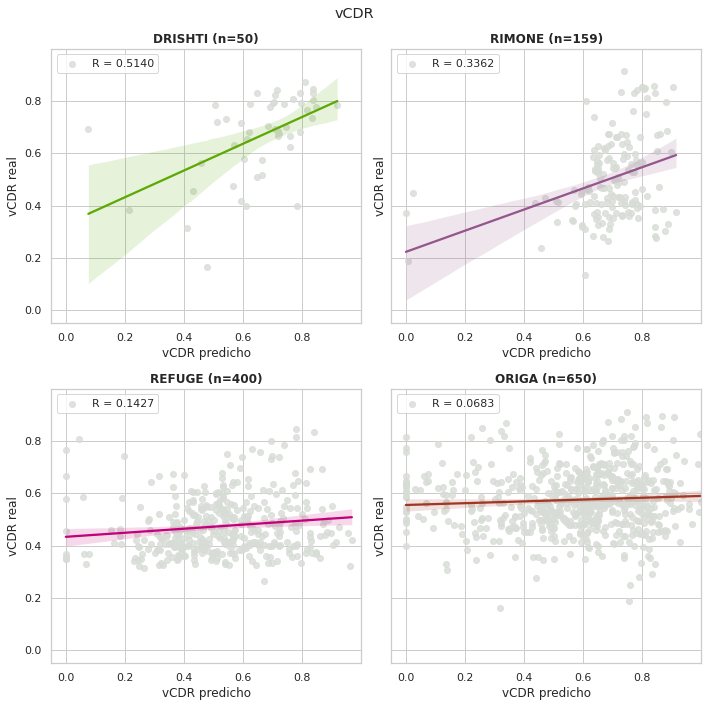

In [150]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
#fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=2,ncols=2, sharey=True)

sns.set_palette("Paired")

sns.set_theme(style="whitegrid")

# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=list(np.arange(0, 1, 0.2)),
        yticks=list(np.arange(0, 1, 0.2)), xlim=[-0.05,1], ylim=[-0.05,1])


plt.xlabel('vCDR predicted')
plt.ylabel('vCDR ground truth')

sns.regplot(x='vCDR predicho',y='vCDR real',data=df_D,ax=axes[0,0],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["leaf green"]})
axes[0,0].set_title('DRISHTI (n=50)',fontweight='bold')
axes[0,0].legend(['R = {:.4f}'.format(cpearson(df_D))], loc='upper left')

sns.regplot(x='vCDR predicho',y='vCDR real',data=df_R3,ax=axes[0,1],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["purplish"]})
axes[0,1].set_title('RIMONE (n=159)',fontweight='bold')
axes[0,1].legend(['R = {:.4f}'.format(cpearson(df_R3))], loc='upper left')


sns.regplot(x='vCDR predicho',y='vCDR real',data=df_R,ax=axes[1,0],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["magenta"]})
axes[1,0].set_title('REFUGE (n=400)',fontweight='bold')
axes[1,0].legend(['R = {:.4f}'.format(cpearson(df_R))], loc='upper left')


sns.regplot(x='vCDR predicho',y='vCDR real',data=df_O,ax=axes[1,1],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["brick"]})
axes[1,1].set_title('ORIGA (n=650)',fontweight='bold')
axes[1,1].legend(['R = {:.4f}'.format(cpearson(df_O))], loc='upper left')

fig.suptitle('vCDR')
plt.tight_layout()

plt.savefig('vCDR_ModelD.jpg')



# Bland altman

In [134]:
def means_limmits(df,sd_limit=1.96):
    means_ = (df['vCDR predicho'] + df['vCDR real']) / 2
    diffs_ = (df['vCDR predicho'] - df['vCDR real'])

    md = np.mean(diffs_)
    sd = np.std(diffs_)

    limits_of_agreement = [md - sd_limit * sd,
                            md + sd_limit * sd]
    return means_, diffs_, md, limits_of_agreement

In [135]:
means_d, diffs_d, md_d, limits_d = means_limmits(df_D)
means_r3, diffs_r3, md_r3, limits_r3 = means_limmits(df_R3)
means_r, diffs_r, md_r, limits_r = means_limmits(df_R)
means_o, diffs_o, md_o, limits_o = means_limmits(df_O)


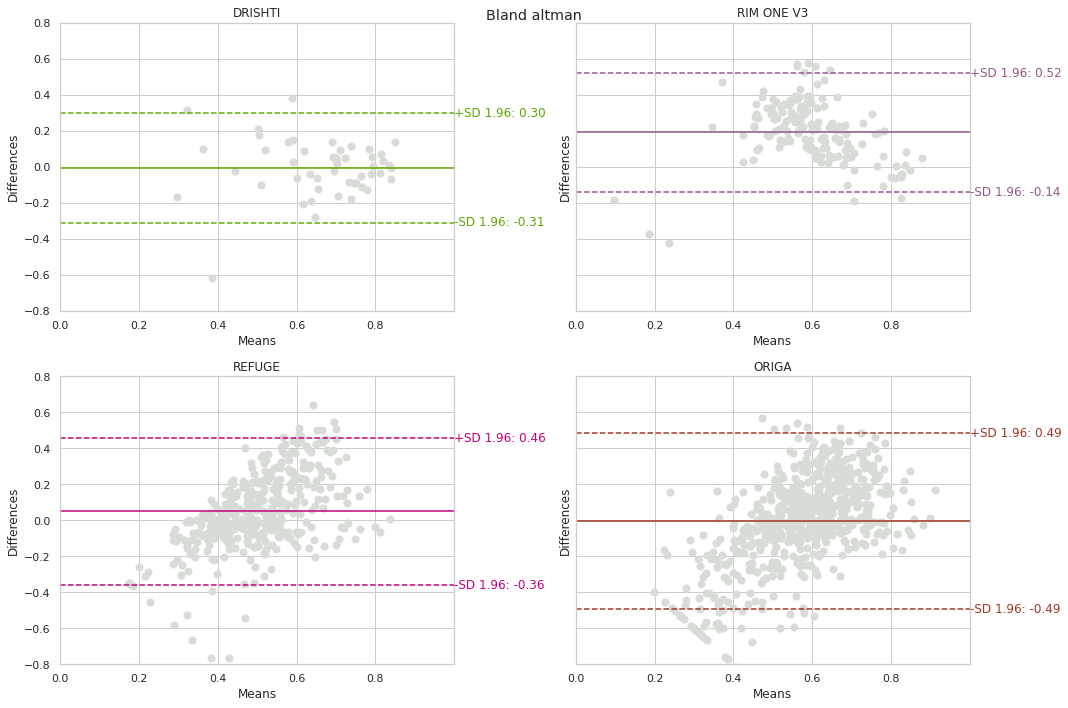

In [152]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

#sns.set_palette("Paired")
sns.set_theme(style="whitegrid")
pallete_test = ["leaf green","purplish","magenta","brick"]
means_ = [means_d,means_r3,means_r,means_o]
diffs_ = [diffs_d,diffs_r3,diffs_r,diffs_o]
md = [md_d,md_r3, md_r, md_o]
limits_of_agreement=[limits_d, limits_r3, limits_r,limits_o]
datasets = ['DRISHTI',"RIM ONE V3", "REFUGE","ORIGA"]

plt.setp(axes, xticks=list(np.arange(0, 1, 0.2)),
        yticks=list(np.arange(-1, 1, 0.2)), xlim=[0,1], ylim=[-0.8,0.8])

i=0
for r in range(2):
    for c in range(2):

        axes[r,c].scatter(x = means_[i], y = diffs_[i], s=50, color=sns.xkcd_rgb["light grey"],vmax=1)

        axes[r,c].axhline(y = md[i], linestyle = '-',color = sns.xkcd_rgb[pallete_test[i]])    
        axes[r,c].axhline(y = (limits_of_agreement[i])[1], linestyle = '--',color = sns.xkcd_rgb[pallete_test[i]])    
        axes[r,c].axhline(y = (limits_of_agreement[i])[0], linestyle = '--',color = sns.xkcd_rgb[pallete_test[i]])

        axes[r,c].text(1, (limits_of_agreement[i])[1], '+SD 1.96: {:.2f}'.format((limits_of_agreement[i])[1]), color = sns.xkcd_rgb[pallete_test[i]], va='center', ha='left')
        axes[r,c].text(1, (limits_of_agreement[i])[0], '-SD 1.96: {:.2f}'.format((limits_of_agreement[i])[0]), color = sns.xkcd_rgb[pallete_test[i]], va='center', ha='left')        

        axes[r,c].set_xlabel("Means")
        axes[r,c].set_ylabel("Differences")
        axes[r,c].set_title(datasets[i])
        i +=1
        #plt.show()
        plt.tight_layout()




fig.suptitle('Bland altman')

plt.savefig('bland_altman.jpg')
plt.show()



# MODELR

In [6]:
predict_path = '/mnt/Almacenamiento/ODOC_segmentation/predicted/ModelR/'
data_path = '/mnt/Almacenamiento/ODOC_segmentation/data/'
dataset_predicted = 'DRISHTI'
dataset_to_train = 'DRISHTI'# 'DRIDHTI' 

In [7]:
p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('DRISHTI',test=True)
vCDR_D, vCDR_gt_D = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)

p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('RIM_ONE_R3',test=False)
vCDR_R3, vCDR_gt_R3 = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)

p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('REFUGE',test=True)
vCDR_R, vCDR_gt_R = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)

p_OC_D, p_OD_D, gt_OC_D, gt_OD_D = get_paths('PAPILA',test=False)
vCDR_P, vCDR_gt_P = get_vCDR_estimation(p_OC_D, p_OD_D, gt_OC_D, gt_OD_D)


vCDR_data_D= {
    'vCDR real' :vCDR_gt_D,
    'vCDR predicho':vCDR_D
    }

vCDR_data_R3={
    'vCDR real' :vCDR_gt_R3,
    'vCDR predicho':vCDR_R3
}

vCDR_data_R ={
    'vCDR real' :vCDR_gt_R,
    'vCDR predicho':vCDR_R
}

vCDR_data_P={
    'vCDR real' :vCDR_gt_P,
    'vCDR predicho':vCDR_P
}

df_D = pd.DataFrame(vCDR_data_D)
df_R3 = pd.DataFrame(vCDR_data_R3)
df_R = pd.DataFrame(vCDR_data_R)
df_P = pd.DataFrame(vCDR_data_P)

/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/euge/anaconda3/envs/ODOC_seg/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


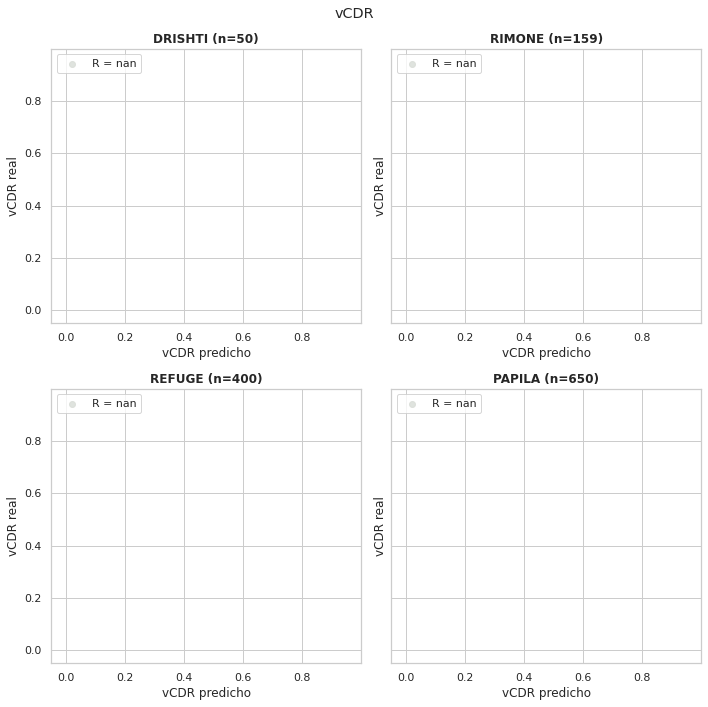

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
#fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=2,ncols=2, sharey=True)

sns.set_palette("Paired")

sns.set_theme(style="whitegrid")

# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=list(np.arange(0, 1, 0.2)),
        yticks=list(np.arange(0, 1, 0.2)), xlim=[-0.05,1], ylim=[-0.05,1])


plt.xlabel('vCDR predicted')
plt.ylabel('vCDR ground truth')

sns.regplot(x='vCDR predicho',y='vCDR real',data=df_D,ax=axes[0,0],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["leaf green"]})
axes[0,0].set_title('DRISHTI (n=50)',fontweight='bold')
axes[0,0].legend(['R = {:.4f}'.format(cpearson(df_D))], loc='upper left')

sns.regplot(x='vCDR predicho',y='vCDR real',data=df_R3,ax=axes[0,1],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["purplish"]})
axes[0,1].set_title('RIMONE (n=159)',fontweight='bold')
axes[0,1].legend(['R = {:.4f}'.format(cpearson(df_R3))], loc='upper left')


sns.regplot(x='vCDR predicho',y='vCDR real',data=df_R,ax=axes[1,0],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["magenta"]})
axes[1,0].set_title('REFUGE (n=400)',fontweight='bold')
axes[1,0].legend(['R = {:.4f}'.format(cpearson(df_R))], loc='upper left')


sns.regplot(x='vCDR predicho',y='vCDR real',data=df_P,ax=axes[1,1],color=sns.xkcd_rgb["light grey"],line_kws={"color": sns.xkcd_rgb["brick"]})
axes[1,1].set_title('PAPILA (n=650)',fontweight='bold')
axes[1,1].legend(['R = {:.4f}'.format(cpearson(df_P))], loc='upper left')

fig.suptitle('vCDR')
plt.tight_layout()

plt.savefig('vCDR_ModelR.jpg')


# Generar tabla de metricas
generamos una tabla de metricas conel Mean Absolute Error, el RMSE radio de(mean squared error), R

In [121]:
import pandas as pd

datasets = ['DRISHTI', 'REFUGE', 'RIM_ONE_V3','ORIGA']

final_df = pd.DataFrame()
final_df['Dataset']=datasets

dMAE = mae(df_D)
rMAE = mae(df_R)
r3MAE = mae(df_R3)
oMAE = mae(df_O)

final_df['MAE']= [dMAE,rMAE,r3MAE,oMAE]

dMAE = RMSE(df_D)
rMAE = RMSE(df_R)
r3MAE = RMSE(df_R3)
oMAE = RMSE(df_O)

final_df['RMSE']= [dMAE,rMAE,r3MAE,oMAE]

dMAE = cpearson(df_D)
rMAE = cpearson(df_R)
r3MAE = cpearson(df_R3)
oMAE = cpearson(df_O)

final_df['R']= [dMAE,rMAE,r3MAE,oMAE]

dMAE = r_squared(df_D)
rMAE = r_squared(df_R)
r3MAE = r_squared(df_R3)
oMAE = r_squared(df_O)

final_df['R2']= [dMAE,rMAE,r3MAE,oMAE]


final_df

,Dataset,MAE,RMSE,R,R2
0,DRISHTI,0.111978,0.155002,0.513976,0.264171
1,REFUGE,0.161080,0.213511,0.142706,0.020365
2,RIM_ONE_V3,0.215808,0.255450,0.336229,0.113050
3,ORIGA,0.195455,0.251670,0.047904,0.002295
